In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
# %matplotlib inline

In [280]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [281]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

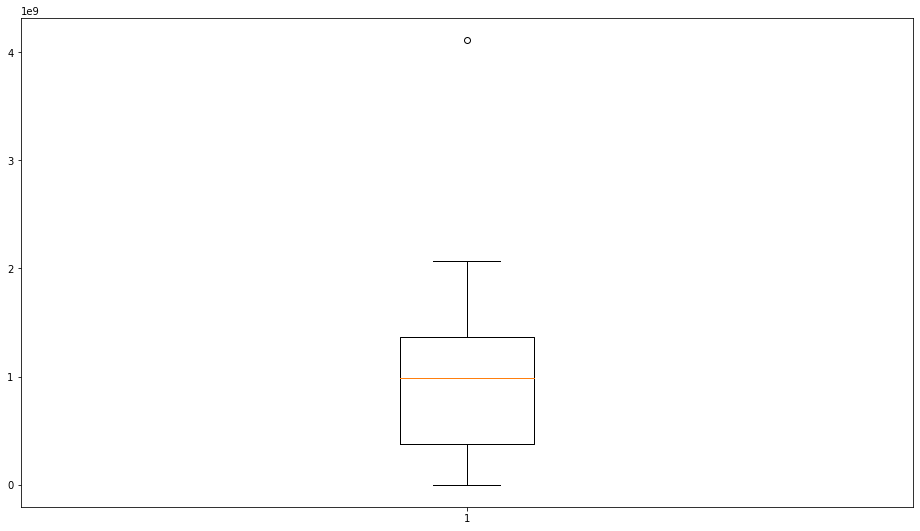

In [282]:
fig = plt.figure(figsize=(16,9))

# Group Data by director_name
grpDirName = data.groupby("director_name")

# Aggregate group using count and sum and show only the gross values
aggGrp = grpDirName.aggregate(['count', 'sum'])["gross"]

# Sort group to the highest count values (up to 10) 
top_dirs =  aggGrp.sort_values('count', ascending=False)[:10]

# use box plot for gross earnings
plt.boxplot(top_dirs["sum"])
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

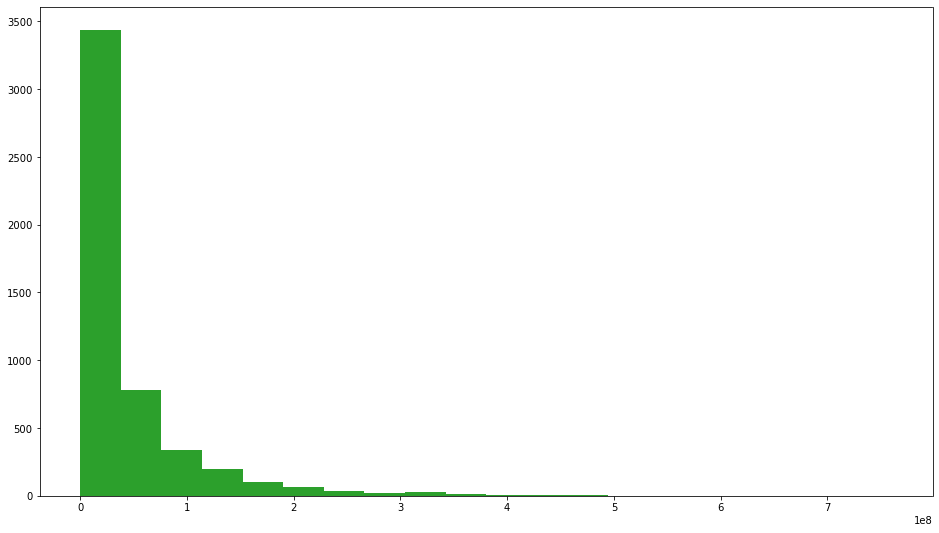

In [283]:
fig = plt.figure(figsize=(16,9))
plt.hist(data["num_critic_for_reviews"], bins=20)
plt.hist(data["imdb_score"], bins = 20)
plt.hist(data["gross"], bins=20)
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [284]:
data["sales"] = data["gross"] - data["budget"]
data["sales"]

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [285]:
data.groupby("director_name").aggregate('sum').sort_values("sales", ascending=False)["sales"][:1]

director_name
Steven Spielberg    2.451332e+09
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

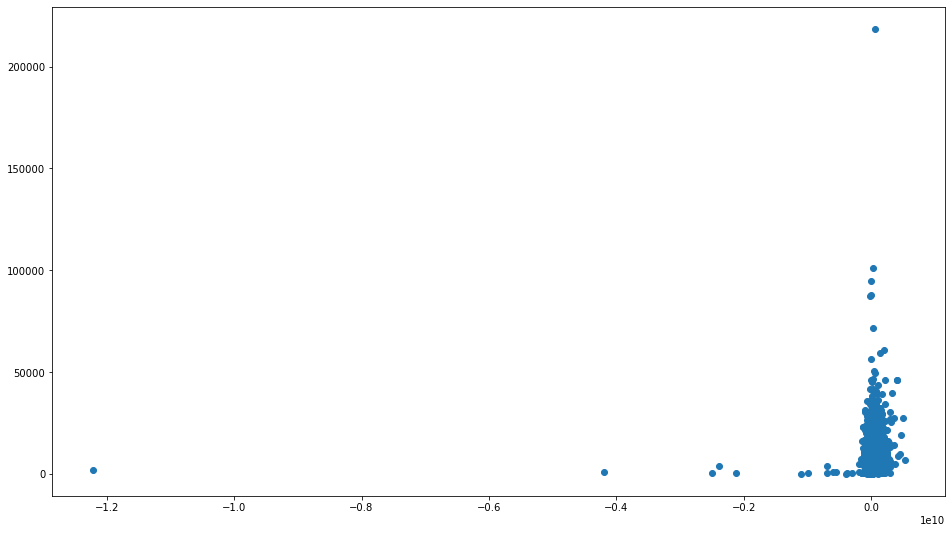

In [286]:
avg_likes = data[["director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "cast_total_facebook_likes", "actor_2_facebook_likes", "movie_facebook_likes"]].mean(axis=1)

fig = plt.figure(figsize=(16,9))
plt.scatter(data["sales"], avg_likes)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

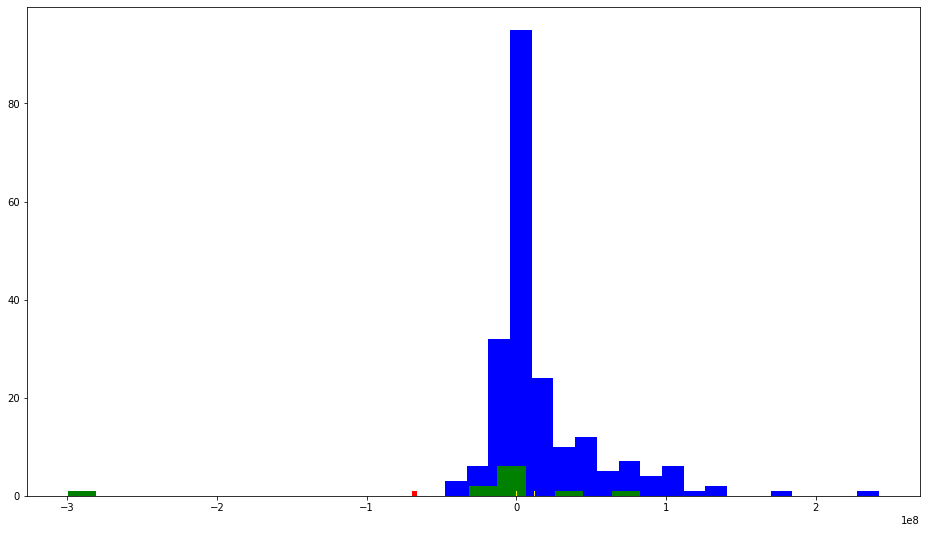

In [287]:
fig = plt.figure(figsize=(16,9))

cond = data["genres"] == "Romance"
plt.hist(data[cond]["sales"], bins=20, color="red")

cond = data["genres"] == "Comedy"
plt.hist(data[cond]["sales"], bins=20, color="blue")

cond = data["genres"] == "Action"
plt.hist(data[cond]["sales"], bins=20, color="green")

cond = data["genres"] == "Fantasy"
plt.hist(data[cond]["sales"], bins=20, color="yellow")
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [288]:
data["average_actor_likes"] = data[[ "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]].mean(axis=1)
data["average_actor_likes"]

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64

## Copying the whole dataframe

In [289]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [290]:
# list of columns that makes sense to normalize
numeric_cols = [
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

for col in numeric_cols:
	df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

df[["movie_title"] + numeric_cols][:5]

,movie_title,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,b'Avatar',0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,0.019402,0.006832,0.831579,0.094556
1,"b""Pirates of the Caribbean: At World's End""",0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,0.024559,0.036496,0.747368,0.000000
2,b'Spectre',0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,0.020056,0.002869,0.715789,0.243553
3,b'The Dark Knight Rises',1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,0.020466,0.167883,0.894737,0.469914
4,b'Star Wars: Episode VII - The Force Awakens ...,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000,0.000088,0.747368,0.000000
